# Airbnb new User Booking (Data Analysis)

> https://github.com/NamrataThakur/Airbnb-New-User-Prediction (참고 URL)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Load

In [2]:
DATA_IN_PATH = '.\\data\\'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
age_gender_bkts.csv           0.01MB
countries.csv                 0.0MB
sample_submission_NDF.csv     0.93MB
sessions.csv                  631.65MB
test_users.csv                6.76MB
train_users_2.csv             24.85MB


In [3]:
age_gender_bkts = pd.read_csv(DATA_IN_PATH + 'age_gender_bkts.csv')
countries = pd.read_csv(DATA_IN_PATH + 'countries.csv')
sessions = pd.read_csv(DATA_IN_PATH + 'sessions.csv')
test_users = pd.read_csv(DATA_IN_PATH + 'test_users.csv')
train_users_2 = pd.read_csv(DATA_IN_PATH + 'train_users_2.csv')
ALL_DATA = [age_gender_bkts, countries, sessions, test_users, train_users_2]

sample_submission_NDF = pd.read_csv(DATA_IN_PATH + 'sample_submission_NDF.csv')

In [4]:
# 데이터의 간단한 정보 확인
def data_info(data, num):
    print("*********************---{}---*********************".format(num+1))
    print('-------------------데이터 정보-------------------')
    print(data.info())
    print('-------------------결측치 확인-------------------')
    print(data.isnull().sum())
    print('-------------------데이터 예시-------------------')
    print(data.head(5))
    print()

In [5]:
for i, data in enumerate(ALL_DATA):
    data_info(data, i)

*********************---1---*********************
-------------------데이터 정보-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None
-------------------결측치 확인-------------------
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
-------------------데이터 예시-------------------
  age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male     

## 2. age gender bkts 데이터 분석

* 목적지(여행 장소)의 여행자 연령층 정보를 가지고 있는 데이터\
(나이와 성별에 따라 destination 요약 통계자료)

In [6]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


* 확인 해볼만한 데이터
    * 각 나라별 여행자 연령층
    * 각 나라별 여행자 성별
    * 각 나라별 성별에 따른 연령층

### 각 나라별 여행자 연령층

In [7]:
ageOfContry = age_gender_bkts.groupby(['country_destination', 'age_bucket'])['population_in_thousands'].sum().unstack()
ageOfContry = ageOfContry[['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
              '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', 
              '80-84', '85-89', '90-94', '95-99', '100+']]
xlabels = ageOfContry.columns
ageOfContry

age_bucket,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
country_destination,,,,,,,,,,,,,,,,,,,,,
AU,1605.0,1529.0,1450.0,1505.0,1607.0,1746.0,1746.0,1598.0,1658.0,1571.0,...,1453.0,1296.0,1166.0,853.0,636.0,451.0,297.0,141.0,34.0,5.0
CA,2036.0,1971.0,1912.0,2063.0,2362.0,2493.0,2502.0,2381.0,2348.0,2449.0,...,2592.0,2236.0,1887.0,1365.0,976.0,740.0,483.0,221.0,55.0,8.0
DE,3524.0,3471.0,3692.0,4050.0,4427.0,5088.0,5198.0,4850.0,5192.0,6882.0,...,5979.0,5374.0,4137.0,4461.0,4353.0,2502.0,1505.0,645.0,88.0,17.0
ES,2470.0,2542.0,2313.0,2114.0,2281.0,2627.0,3394.0,4083.0,3976.0,3761.0,...,3010.0,2551.0,2370.0,1920.0,1594.0,1402.0,869.0,368.0,86.0,12.0
FR,3973.0,3906.0,3879.0,3932.0,3987.0,4122.0,4081.0,3698.0,4443.0,4414.0,...,4064.0,3956.0,3765.0,2420.0,2141.0,1849.0,1243.0,629.0,102.0,22.0
GB,3869.0,3920.0,3461.0,3647.0,4018.0,4335.0,4302.0,3943.0,4248.0,4650.0,...,3916.0,3468.0,3593.0,2695.0,2144.0,1557.0,967.0,455.0,110.0,16.0
IT,2851.0,2868.0,2856.0,2904.0,3115.0,3283.0,3605.0,4207.0,4839.0,4956.0,...,4045.0,3629.0,3609.0,2905.0,2725.0,2039.0,1295.0,600.0,101.0,18.0
NL,900.0,923.0,1010.0,994.0,1031.0,1023.0,1000.0,980.0,1165.0,1287.0,...,1161.0,1047.0,1045.0,726.0,541.0,389.0,229.0,94.0,19.0,2.0
PT,464.0,514.0,554.0,543.0,560.0,608.0,733.0,833.0,834.0,781.0,...,709.0,649.0,580.0,484.0,421.0,316.0,174.0,64.0,12.0,1.0


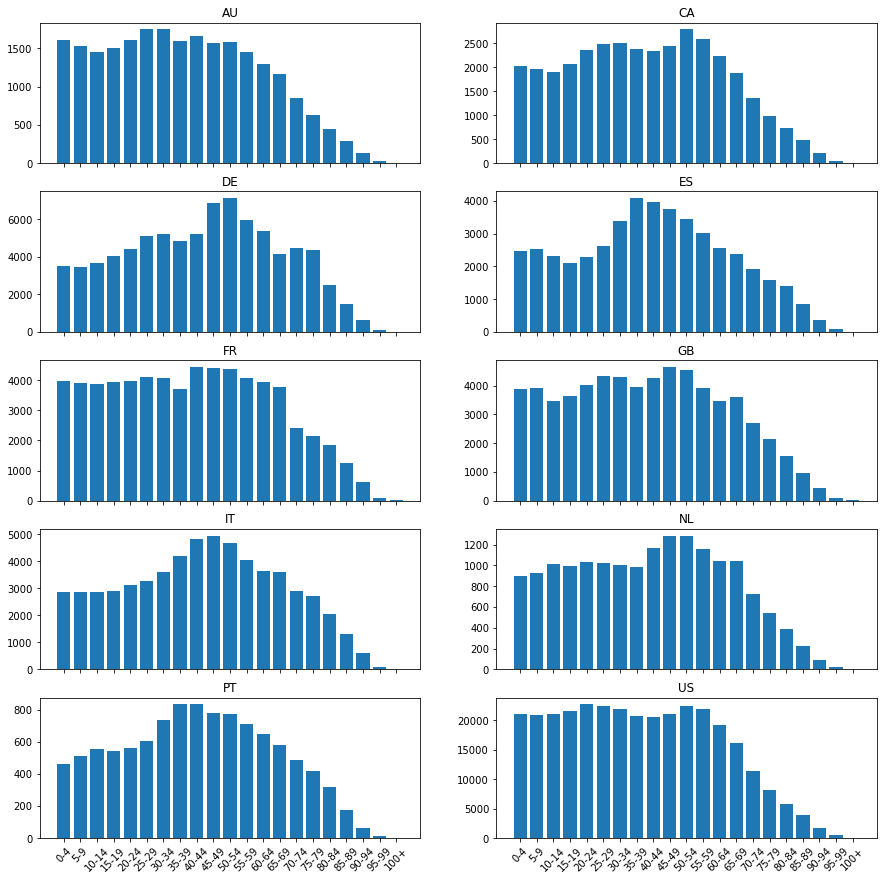

In [8]:
n = len(ageOfContry.index) # 10개

# fig = plt.figure(figsize=(20, 8))
fig, axes = plt.subplots(5, n // 5, figsize=(15, 15), sharex=True)

for i, ax in enumerate(axes.flat):
    ax.set_title("{}".format(ageOfContry.iloc[i].name))
    ax.bar(range(len(xlabels)), ageOfContry.iloc[i])
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels, rotation=45)

### 각 나라별 여행자 성별

In [9]:
sexOfContry = age_gender_bkts.groupby(['country_destination', 'gender'])['population_in_thousands'].sum().unstack()
xlabels = sexOfContry.columns
sexOfContry

gender,female,male
country_destination,,
AU,12024.0,11899.0
CA,18066.0,17805.0
DE,41997.0,40565.0
ES,23870.0,23333.0
FR,33493.0,31490.0
GB,32345.0,31495.0
IT,31405.0,29740.0
NL,8486.0,8362.0
PT,5468.0,5141.0


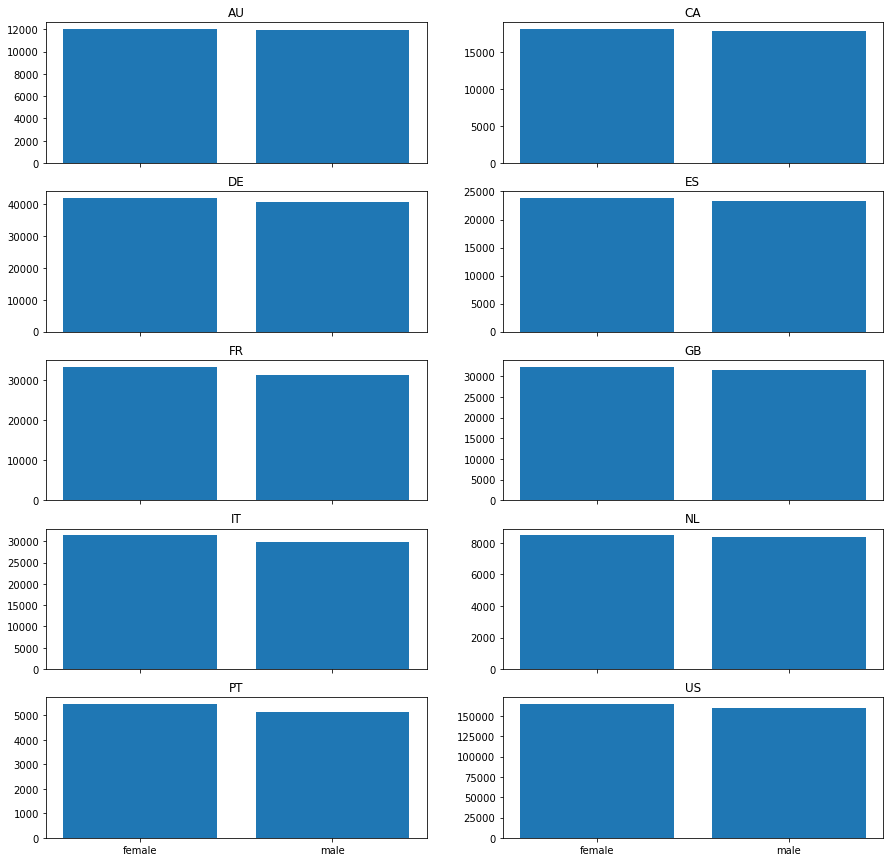

In [10]:
n = len(sexOfContry.index) # 10개

fig, axes = plt.subplots(5, n // 5, figsize=(15, 15), sharex=True)

for i, ax in enumerate(axes.flat):
    ax.set_title("{}".format(sexOfContry.iloc[i].name))
    ax.bar(range(len(xlabels)), sexOfContry.iloc[i])
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)

### 각 나라별 성별에 따른 연령층

In [11]:
sexageOfContry = age_gender_bkts.groupby(['country_destination', 'gender', 'age_bucket'])['population_in_thousands'].sum().unstack()
sexageOfContry = sexageOfContry[['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
              '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', 
              '80-84', '85-89', '90-94', '95-99', '100+']]
xlabels = sexageOfContry.columns
sexageOfContry

age_bucket                      0-4      5-9    10-14    15-19    20-24  \
country_destination gender                                                
AU                  female    781.0    745.0    707.0    737.0    787.0   
                    male      824.0    784.0    743.0    768.0    820.0   
CA                  female    991.0    960.0    929.0   1009.0   1159.0   
                    male     1045.0   1011.0    983.0   1054.0   1203.0   
DE                  female   1713.0   1690.0   1800.0   1974.0   2161.0   
                    male     1811.0   1781.0   1892.0   2076.0   2266.0   
ES                  female   1198.0   1235.0   1124.0   1027.0   1106.0   
                    male     1272.0   1307.0   1189.0   1087.0   1175.0   
FR                  female   1938.0   1914.0   1894.0   1916.0   1947.0   
                    male     2035.0   1992.0   1985.0   2016.0   2040.0   
GB                  female   1888.0   1913.0   1690.0   1783.0   1957.0   
                    male     1981.0   2007.0   1771.0   1864.0   2061.0   
IT                  female   1383.0   1395.0   1388.0   1411.0   1514.0   
                    male     1468.0   1473.0   1468.0   1493.0   1601.0   
NL                  female    438.0    450.0    493.0    484.0    504.0   
                    male      462.0    473.0    517.0    510.0    527.0   
PT                  female    225.0    250.0    269.0    266.0    275.0   
                    male      239.0    264.0    285.0    277.0    285.0   
US                  female  10306.0  10201.0  10346.0  10570.0  11094.0   
                    male    10788.0  10632.0  10771.0  11025.0  11601.0   

age_bucket                    25-29    30-34    35-39    40-44    45-49  ...  \
country_destination gender                                               ...   
AU                  female    851.0    865.0    801.0    838.0    793.0  ...   
                    male      895.0    881.0    797.0    820.0    778.0  ...   
CA                  female   1220.0   1240.0   1192.0   1169.0   1217.0  ...   
                    male     1273.0   1262.0   1189.0   1179.0   1232.0  ...   
DE                  female   2495.0   2571.0   2402.0   2559.0   3357.0  ...   
                    male     2593.0   2627.0   2448.0   2633.0   3525.0  ...   
ES                  female   1280.0   1646.0   1966.0   1924.0   1852.0  ...   
                    male     1347.0   1748.0   2117.0   2052.0   1909.0  ...   
FR                  female   2041.0   2046.0   1856.0   2231.0   2220.0  ...   
                    male     2081.0   2035.0   1842.0   2212.0   2194.0  ...   
GB                  female   2122.0   2112.0   1964.0   2147.0   2349.0  ...   
                    male     2213.0   2190.0   1979.0   2101.0   2301.0  ...   
IT                  female   1610.0   1791.0   2090.0   2411.0   2480.0  ...   
                    male     1673.0   1814.0   2117.0   2428.0   2476.0  ...   
NL                  female    505.0    497.0    490.0    583.0    637.0  ...   
                    male      518.0    503.0    490.0    582.0    650.0  ...   
PT                  female    299.0    362.0    414.0    418.0    395.0  ...   
                    male      309.0    371.0    419.0    416.0    386.0  ...   
US                  female  11011.0  10863.0  10352.0  10308.0  10659.0  ...   
                    male    11385.0  10984.0  10329.0  10159.0  10454.0  ...   

age_bucket                    55-59    60-64   65-69   70-74   75-79   80-84  \
country_destination gender                                                     
AU                  female    739.0    660.0   592.0   438.0   338.0   252.0   
                    male      714.0    636.0   574.0   415.0   298.0   199.0   
CA                  female   1305.0   1142.0   973.0   715.0   530.0   422.0   
                    male     1287.0   1094.0   914.0   650.0   446.0   318.0   
DE                  female   2996.0   2799.0  2134.0  2362.0  2421.0  1486.0   
                    male    

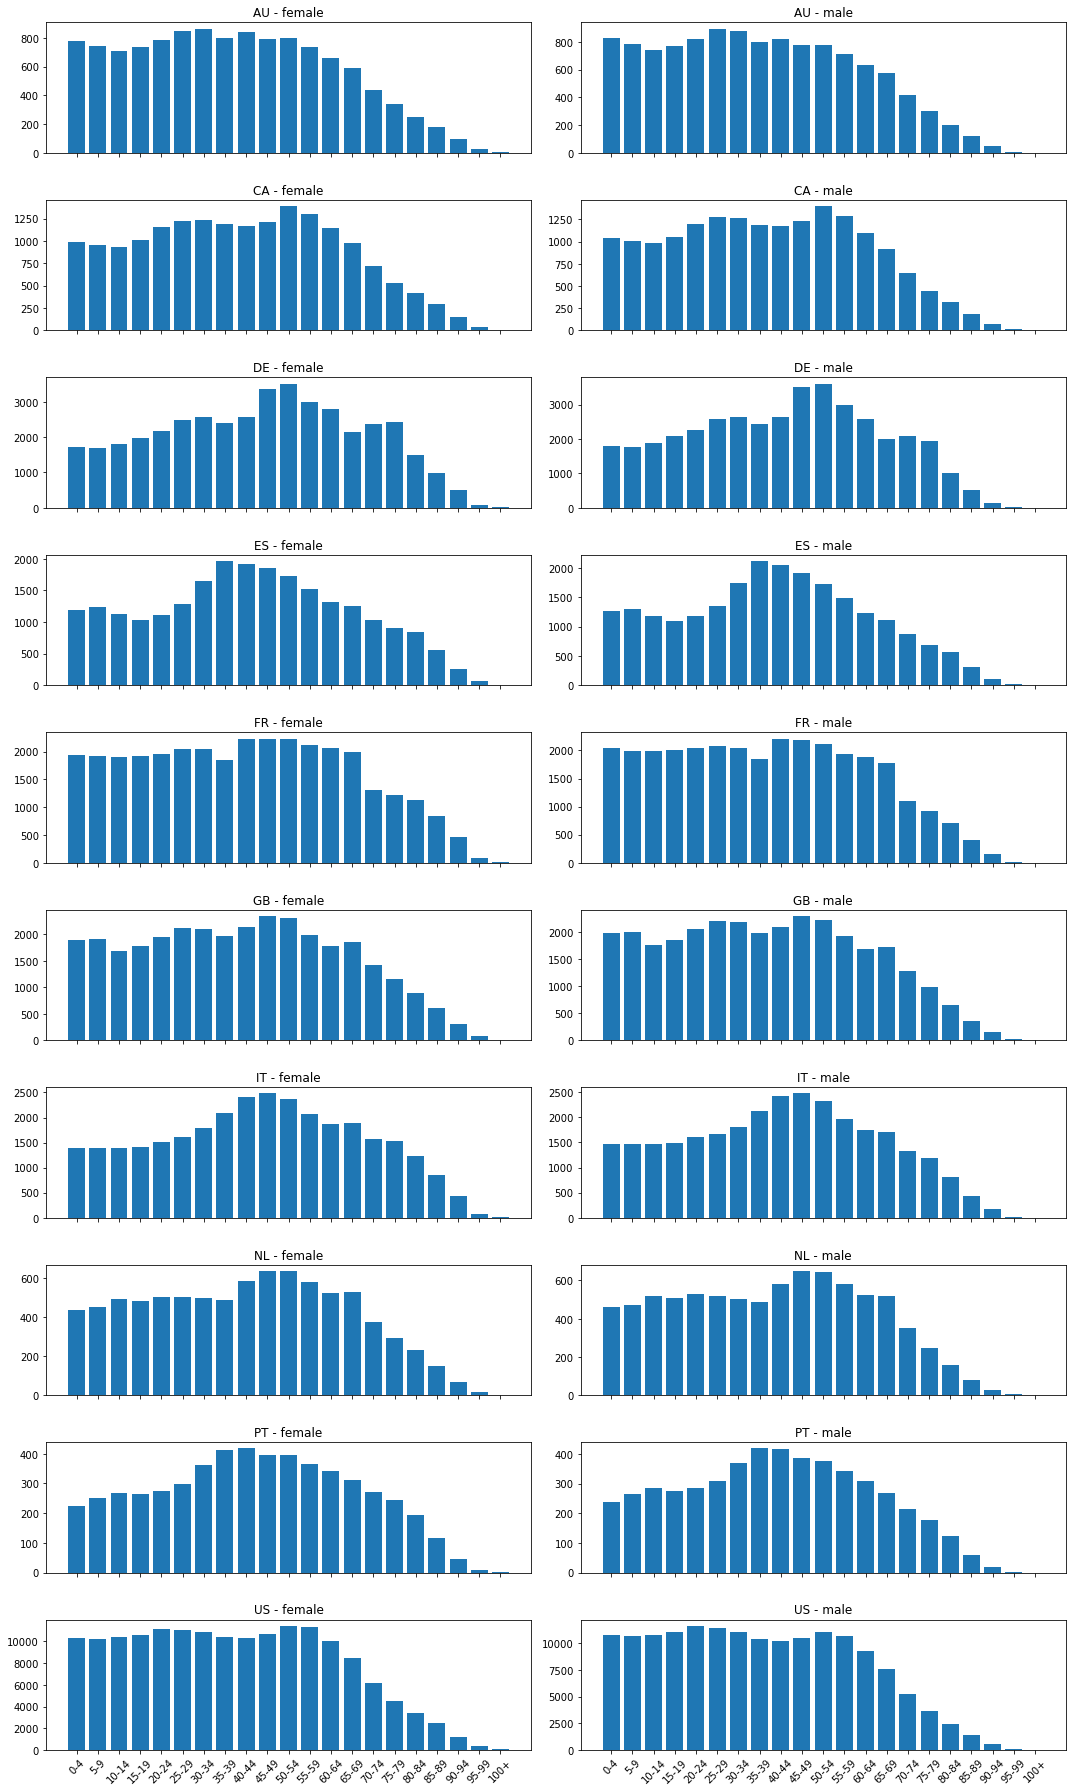

In [12]:
n = len(sexageOfContry.index) # 10개

fig, axes = plt.subplots(10, 2, figsize=(15, 25), sharex=True)

for i, ax in enumerate(axes.flat):
    ax.set_title("{} - {}".format(sexageOfContry.iloc[i].name[0], sexageOfContry.iloc[i].name[1]))
    ax.bar(range(len(xlabels)), sexageOfContry.iloc[i])
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels, rotation=45)
plt.tight_layout(h_pad = 2.5)

* 연령층별 가장 많이가는 여행지

In [13]:
temp = age_gender_bkts.groupby(["country_destination", "age_bucket"])['population_in_thousands'].sum()
max_age = temp.groupby('country_destination').idxmax()
max_age

country_destination
AU    (AU, 25-29)
CA    (CA, 50-54)
DE    (DE, 50-54)
ES    (ES, 35-39)
FR    (FR, 40-44)
GB    (GB, 45-49)
IT    (IT, 45-49)
NL    (NL, 45-49)
PT    (PT, 40-44)
US    (US, 20-24)
Name: population_in_thousands, dtype: object

* 결과
    * 성별에 따른 여행지에는 큰 차이가 없다
    * 연령대별 여행지 확인

## 3. countries 데이터 분석
* 첫 예약 국가 요약 통계자료

In [14]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


* 확인 해볼만한 데이터
    * 언어 유사도 사용??

## 4. sessions  데이터
* sessions.csv - 웹 사용자 log



    * user_id : 유저 id

    * action  : 활동 ( search_result, lookup, index etc)

    * action_type : Click, View etc

    * device_type : Window/Mac desktop etc

    * secs_elapsed : session 사용시간
    
* 확인 해볼만한 데이터
    * 액션의 종류, 사용시간, 액션 디테일을 사용하여 얼마나 예약을 하는가?

### 사용 시간에 따른 여행지 선택 관계

In [82]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


1. user_id별로 elapsed의 합으로 새로운 데이터 추출
2. train 데이터의 id와 같은 사용자의 여행국가를 병합
3. elapsed과 country_destination의 상관관계 조사

In [83]:
# 사용시간에 train,test 데이터의 같은 id의 여행지 columns merge
elapse = sessions.groupby('user_id')["secs_elapsed"].sum()
print(len(sessions.user_id.unique()))
# elapse.merge()
elapse = pd.merge(elapse, train_data[['id', 'country_destination']], how='left', left_on='user_id', right_on='id')
elapse.reset_index(drop=True, inplace=True)
elapse

135484


,secs_elapsed,id,country_destination
0,867896.0,00023iyk9l,US
1,586543.0,0010k6l0om,NaN
2,282965.0,001wyh0pz8,NDF
3,297010.0,0028jgx1x1,NDF
4,6487080.0,002qnbzfs5,US
...,...,...,...
135478,639436.0,zzxox7jnrx,NaN
135479,73771.0,zzy7t0y9cm,US
135480,1731.0,zzysuoqg6x,NDF
135481,2149949.0,zzywmcn0jv,NDF


In [84]:
# 여행지가 nan인 값 제거 -> test 데이터의 id
elapse = elapse.sort_values('secs_elapsed')
elapse['country_destination'].isnull().sum()  # 61668
elapse.dropna(inplace=True)
elapse.reset_index(drop=True, inplace=True)
elapse

,secs_elapsed,id,country_destination
0,0.0,ms6iyueskd,NDF
1,0.0,f999xnn91r,NDF
2,0.0,yapcdloujq,US
3,0.0,q6mj8zlbb4,US
4,0.0,d00m12aq2j,CA
...,...,...,...
73810,25840100.0,65guclmeso,NDF
73811,26647578.0,fsa2gw8kk4,FR
73812,28960128.0,wyv1imf8qw,NDF
73813,31393292.0,yu5bdalz2b,US


Text(0, 0.5, 'elapsed')

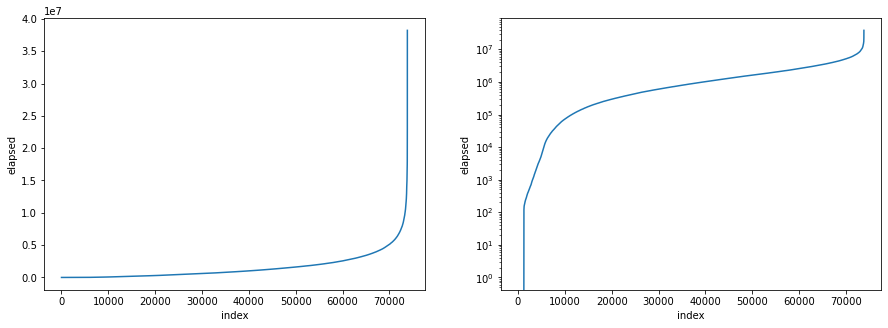

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(elapse['secs_elapsed']);
ax1.set_xlabel("index")
ax1.set_ylabel("elapsed")

ax2.set_yscale('log')
ax2.plot(elapse['secs_elapsed']);
ax2.set_xlabel("index")
ax2.set_ylabel("elapsed")

In [86]:
elapse.country_destination.unique()

array(['NDF', 'US', 'CA', 'other', 'FR', 'ES', 'IT', 'GB', 'PT', 'NL',
       'AU', 'DE'], dtype=object)

<ipython-input-87-abe7a599230f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.append(len(elapse.iloc[li[i-1]: li[i]][elapse.country_destination == contry]))


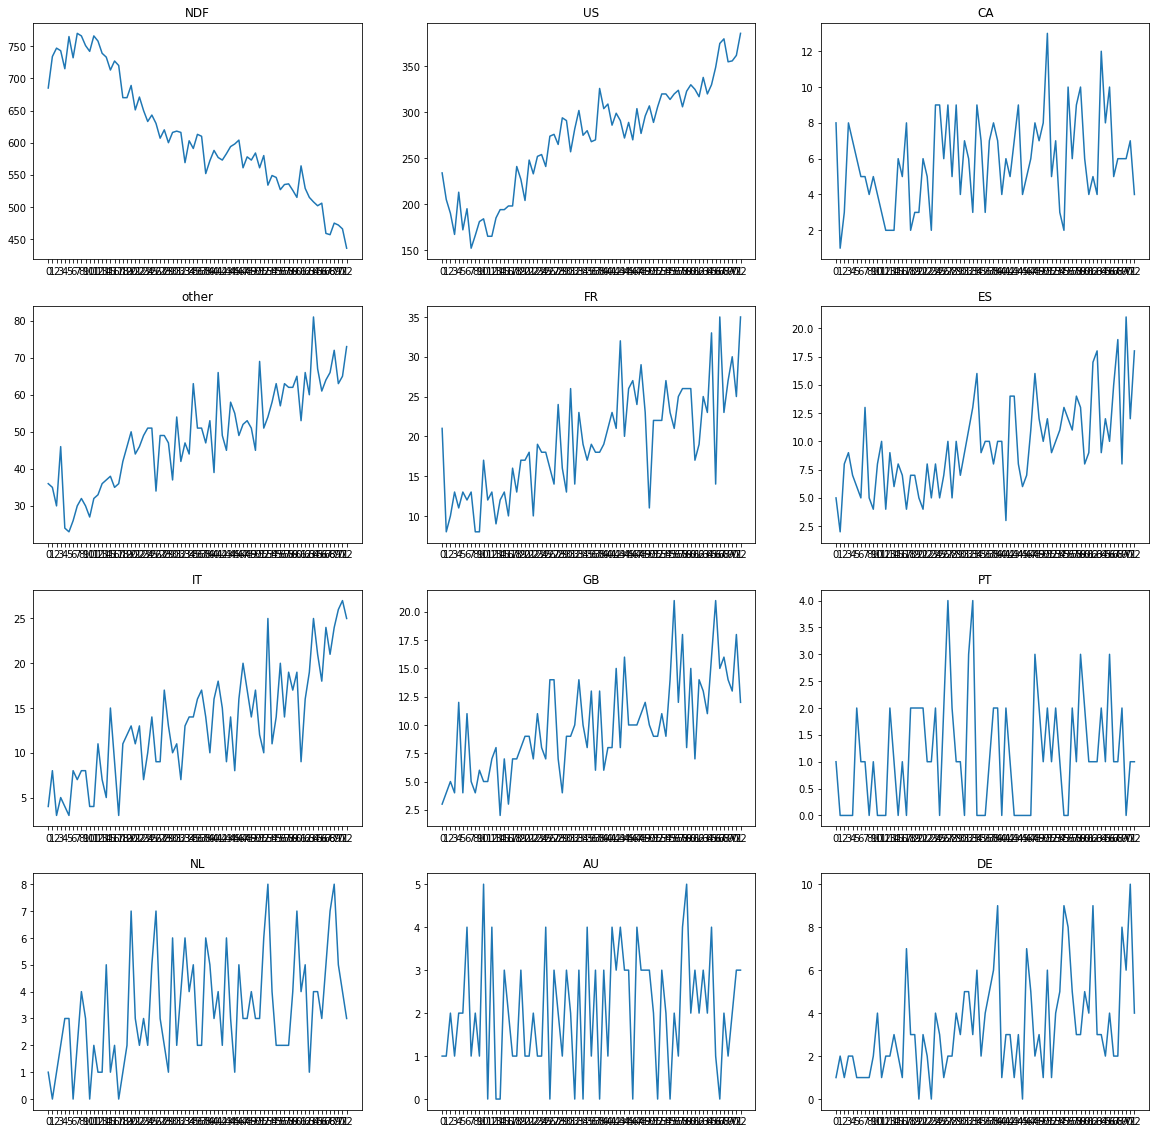

In [87]:
li = list(range(0, 73815, 1000))
results = []

unique_contry = elapse.country_destination.unique()

for contry in unique_contry:
    result = []
    for i in range(1, len(li)):
        result.append(len(elapse.iloc[li[i-1]: li[i]][elapse.country_destination == contry]))
    results.append(result)

# print(results)

fig, axes = plt.subplots(4, 3, figsize=(20,20))

for i, ax in enumerate(axes.flat):
    ax.set_title("{}".format(unique_contry[i]))
    ax.set_xticks(range(len(li)-1))
#     ax.set_xticklabels(li)
    ax.plot(range(len(li)-1), results[i]);

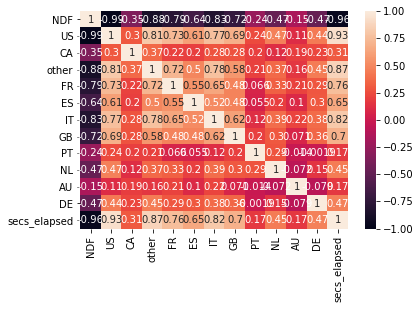

In [88]:
elaspe_corr = {}
for i, c in enumerate(unique_contry):
    elaspe_corr[c] = results[i]
elaspe_corr['secs_elapsed'] = range(len(li)-1)
    
elaspe_corr_df = pd.DataFrame(elaspe_corr)
elaspe_corr_df.corr()
sns.heatmap(elaspe_corr_df.corr(), vmin=-1, vmax=1, annot=True);

* 사용시간이 길어질 수록 NDF일 확률이 낮아지고 여행지를 택하는 경향을 보이지만 NDF의 양이 많아 전체적인 데이터에는 큰 영향이 없을 것으로 예상
* 하지만 히트맵 결과 강한 상관관계를 보이므로 추가하는 것이 좋을 것으로 예상

## 5. train_users_2/test_user 데이터

*id : 유저 id

* date_account_created : 계정 생성 날짜

* timestamp_first_active :  처음 활동한 날짜  (이 feature는 계정 생성 or  첫 예약 날짜보다 이전일 것입니다)

* date_first_booking : 첫 예약한 날짜

* gender : 성별

* age : 나이

* signup_method : 회원가입 방법

* signup_flow : 회원가입할 때 사용자가 보고있는 page 번호

* language : 선호 언어, 사용 언어(모국어)

* affiliate_channel : Airbnb 유입경로

* affiliate_provider : 유입 장소 (google, craigslist, other)

* first_affiliate_tracked : 회원가입 전 user가 반응한 첫번째 marketing

* signup_app : Web , iOS, Android etc

* first_device_type : Window/Mac desktop , iPhone etc

* first_browser : Chrome, Safari, Firefox etc

* country_destination : 첫 예약 국가 / 우리가 예측해야하는 target 변수

In [17]:
train_end = len(train_users_2)
train_data = pd.concat([train_users_2, test_users])

print(train_data.shape)
len(train_data.id.unique())

(275547, 16)


275547

In [18]:
train_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


### 결측치 및 이상치 확인

In [19]:
# 결측치 개수 확인
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [20]:
for column in train_data:
    print("*************************************")
    uni = train_data[column].unique()
    print("{}의 값 종류 {}개\n{}".format(column, len(uni), uni))
    print()

*************************************
id의 값 종류 275547개
['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ... 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']

*************************************
date_account_created의 값 종류 1726개
['2010-06-28' '2011-05-25' '2010-09-28' ... '2014-09-28' '2014-09-29'
 '2014-09-30']

*************************************
timestamp_first_active의 값 종류 275547개
[20090319043255 20090523174809 20090609231247 ... 20140930235408
 20140930235430 20140930235901]

*************************************
date_first_booking의 값 종류 1977개
[nan '2010-08-02' '2012-09-08' ... '2015-06-25' '2015-06-29' '2015-06-28']

*************************************
gender의 값 종류 4개
['-unknown-' 'MALE' 'FEMALE' 'OTHER']

*************************************
age의 값 종류 146개
[      nan 3.800e+01 5.600e+01 4.200e+01 4.100e+01 4.600e+01 4.700e+01
 5.000e+01 3.600e+01 3.700e+01 3.300e+01 3.100e+01 2.900e+01 3.000e+01
 4.000e+01 2.600e+01 3.200e+01 3.500e+01 5.900e+01 4.900e+01 4.400e+01
 3.400e+01 2.800e+01 1.90

* 결측치 처리 필요
* age 이상치 발견
* gender, language에서 -unknown- 값 발견 -> np.nan으로 변경

### 결측치 및 이상치 처리

#### 1. age 이상치 제거

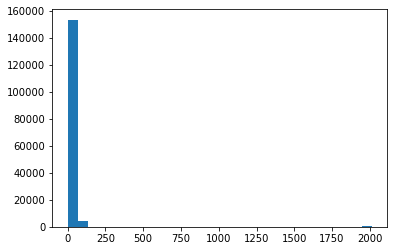

In [21]:
plt.hist(train_data['age'], bins=30);

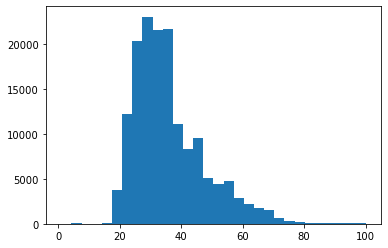

In [22]:
train_data.loc[train_data.age > 100, 'age'] = np.nan
plt.hist(train_data['age'], bins=30);

#### 2. gender 이상치(-unknown-) 제거

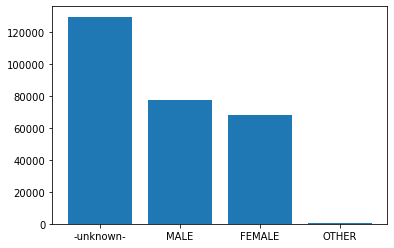

In [23]:
xlabel = train_data.gender.dropna().unique()
x = np.arange(len(xlabel))
y = train_data['gender'].value_counts()

plt.bar(x, y)
plt.xticks(x, xlabel);

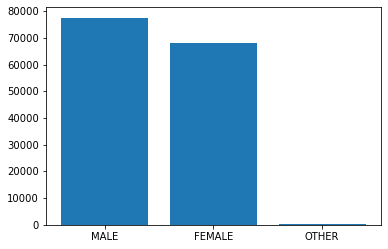

In [24]:
train_data.loc[train_data.gender == '-unknown-', "gender"] = np.nan
xlabel = train_data.gender.dropna().unique() 
x = np.arange(len(xlabel))
y = train_data['gender'].value_counts()

plt.bar(x, y)
plt.xticks(x, xlabel);

#### 3. language 이상치('-unknown-') 제거

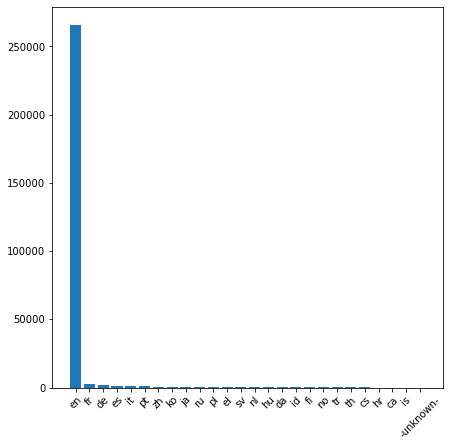

In [26]:
xlabel = train_data.language.dropna().unique() 
x = np.arange(len(xlabel))
y = train_data['language'].value_counts()

plt.figure(figsize=(7,7))
plt.bar(x, y)
plt.xticks(x, xlabel, rotation=45);

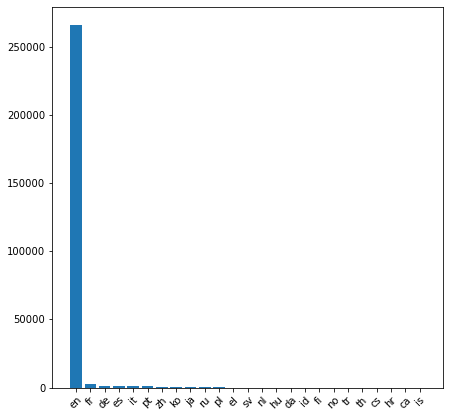

In [27]:
train_data.loc[train_data.language == '-unknown-', 'language'] = np.nan
xlabel = train_data.language.dropna().unique() 
x = np.arange(len(xlabel))
y = train_data['language'].value_counts()

plt.figure(figsize=(7,7))
plt.bar(x, y)
plt.xticks(x, xlabel, rotation=45);

In [28]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                     129480
age                        119556
signup_method                   0
signup_flow                     0
language                        1
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

### 데이터 형식(datetime) 변환

In [29]:
train_data['date_account_created'] = pd.to_datetime(train_data['date_account_created'])
train_data['timestamp_first_active'] = pd.to_datetime(train_data['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,NaN,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
62092,zp8xfonng8,2014-09-30,2014-09-30 23:53:06,NaN,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,NaN
62093,fa6260ziny,2014-09-30,2014-09-30 23:54:08,NaN,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
62094,87k0fy4ugm,2014-09-30,2014-09-30 23:54:30,NaN,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


## 6. 결과

### 필요한 과정
* elapsed 데이터 추가 후 결측치 처리
* age 결측치 처리
* gender 결측치 처리
* datetime형식 처리

#### 1. age 결측치 처리

In [ ]:
* 방법 1. 다른 feature를 활용하여 age 추론 모델을 만들어 적용 (추론 모델의 성능이 매우 떨어짐)

In [33]:
age_processing = train_data[['gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']]
age_processing

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
...,...,...,...,...,...,...,...,...,...,...,...
62091,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [46]:
print(age_processing.dtypes.value_counts())
object_c = age_processing.select_dtypes('object').columns

object     9
int64      1
float64    1
dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder
labler = LabelEncoder()

for c in object_c:
    age_processing[c] = labler.fit_transform(age_processing[c].values)
    
age_processing

<ipython-input-55-0c943881ac57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_processing[c] = labler.fit_transform(age_processing[c].values)


,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,3,NaN,1,0,5,2,4,6,2,3,8
1,1,38.0,1,0,5,7,8,6,2,3,8
2,0,56.0,0,3,5,2,4,6,2,6,22
3,0,42.0,1,0,5,2,4,6,2,3,17
4,3,41.0,0,0,5,2,4,6,2,3,8
...,...,...,...,...,...,...,...,...,...,...,...
62091,3,31.0,0,0,5,2,4,6,2,6,22
62092,3,NaN,0,23,15,2,4,6,0,0,0
62093,3,NaN,0,0,3,2,4,0,2,6,17
62094,3,NaN,0,0,5,5,8,3,2,3,43


<AxesSubplot:>

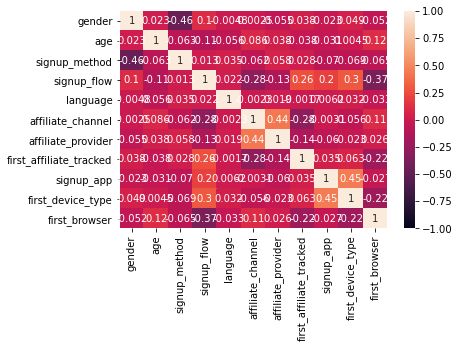

In [90]:
sns.heatmap(age_processing.corr(), vmin=-1, vmax=1, annot=True)

In [74]:
age_processing_train = age_processing[age_processing['age'].notnull()]
age_processing_test = age_processing[age_processing['age'].isnull()].drop('age', axis=1)

age_processing_train_X = age_processing_train.drop('age', axis=1)
age_processing_train_y = age_processing_train['age']

In [75]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
TEST_SPLIT = 0.2

x_train, x_test, y_train, y_test = train_test_split(age_processing_train_X, age_processing_train_y,test_size=TEST_SPLIT,random_state = RANDOM_SEED)

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

# RF = RandomForestRegressor(n_estimators=50,max_depth = 25,
#                            min_samples_leaf = 1, min_samples_split = 6)

# RF.fit(x_train, y_train)

C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# print(RF.score(x_train, y_train))
print(logistic.score(x_train, y_train))

0.05242323225847811
